<a href="https://colab.research.google.com/github/ParhamPishro/Solutions-of-FUM-Academic-Exercises/blob/main/Machine%20Learning/5_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks: CIFAR-10
in this notebook we want to model and train a convolutional neural network that learns from the CIFAR-10 dataset. we will explain the model's architecture, evaluate the model, and take a look at it's learning curve. let's begin by importing the libraries we will be using for today:
1. Tensortflow: this library is a popular machine learning framework which can be used to develope a wide variety of machine learning and deep learning applications.

2. Keras: while technically a part of Tensorflow, Keras is a high level framework that abstracts away a lot of tensorflow's functionalities and makes developement of machine learning applications easier than ever.

3. Matplotlib: This one is a very popular library for visualization tasks. it gives us a lot of customizability in terms of what we want to visualize and how we want to do it. we will be using this library to visualize out model's learning curve.

In [ ]:
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras import layers
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt

### 1. Loading and preprocessing the data:
in this step, we will load and preprocess our data so that we can use it for training and evaluating our CNN model.

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Data Preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
50000 train samples
10000 test samples


as you can see, we have 50,000 train, and 10,000 test images. our images have a resolution of 32x32 and 3 RGB channels for colors of each pixel. we have also scaled our feature space and turned our targets into a categorical datatype in order to use them for classification.

# 2. Defining the model
in this step, we will define our CNN model and shape its architecture before training it. our model will have 3 convolutional layers combined with pooling and regularization layers. we will also compile the model, which initializes the weights, defines the optimization algorithm, defines the loss function, and the metric we want to maximize. in this model we use the "Adam" optimizer which is the most efficient and widely use optimizer for neural networks. the loss function is also "Categorical Cross Entropy" which is the loss function that's used for classification tasks.

In [ ]:
# Define the CNN Model
model = keras.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),


    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Convolutional Layer 3
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),


    # Flattening
    layers.Flatten(),


    # Fully Connected Layers
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

The model is built in blocks. each block goes like this: Input -> ConvLayer -> Pooling -> Dropout. where pooling is used to reduce the dimensions of our outputs, and Dropout is used for regularization in order to prevent our model from overfitting.

after the convolutional layers, we flatten our output which is done by the "flatten" layer. this layer turns our 2d output into a 1d vector to be fed into a regular dense neural network. after that we have a dense layer with 512 neurons and a dropout layer for regularization, and a final dense layer with 10 neurons and a softmax activation function which returns the probability of our input belonging to each of the classes in our target data.

our convolutional layers have 3x3 filters and the number of filters increase with every layer. as the dimensions of our input decreases by the pooling layer, the number of filters increase.

# 3. Training the model
in this step we will train the model that we have defined above. thanks to the simplifed keras implementation, this can be done with a single line of code. this function trains the neural network, evaluates the model after every epoch, and gives us a good sense of how the training progress is going.

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
782/782 [==============================] - 9s 9ms/step - loss: 1.6524 - accuracy: 0.3850 - val_loss: 1.2938 - val_accuracy: 0.5320
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 1.2284 - accuracy: 0.5578 - val_loss: 1.0729 - val_accuracy: 0.6151
Epoch 3/20
782/782 [==============================] - 6s 8ms/step - loss: 1.0519 - accuracy: 0.6256 - val_loss: 0.9346 - val_accuracy: 0.6732
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 0.9372 - accuracy: 0.6703 - val_loss: 0.8606 - val_accuracy: 0.6969
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 0.8655 - accuracy: 0.6951 - val_loss: 0.8333 - val_accuracy: 0.7091
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 0.8014 - accuracy: 0.7180 - val_loss: 0.7472 - val_accuracy: 0.7412
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 0.7548 - accuracy: 0.7363 - val_loss: 0.6905 - val_accuracy: 0.7598
Epoch 

as you can see from the training logs, we have managed to achieve a very good 80% accuracy on our test dataset.

# 4. Visualizing the training process of our model.
in this step, we will use matplotliv in order to visualize the training process of our model, which is a graph that shows the accuracy of our model over time. it will also show the accuracy of our model on the test dataset as a bonus.

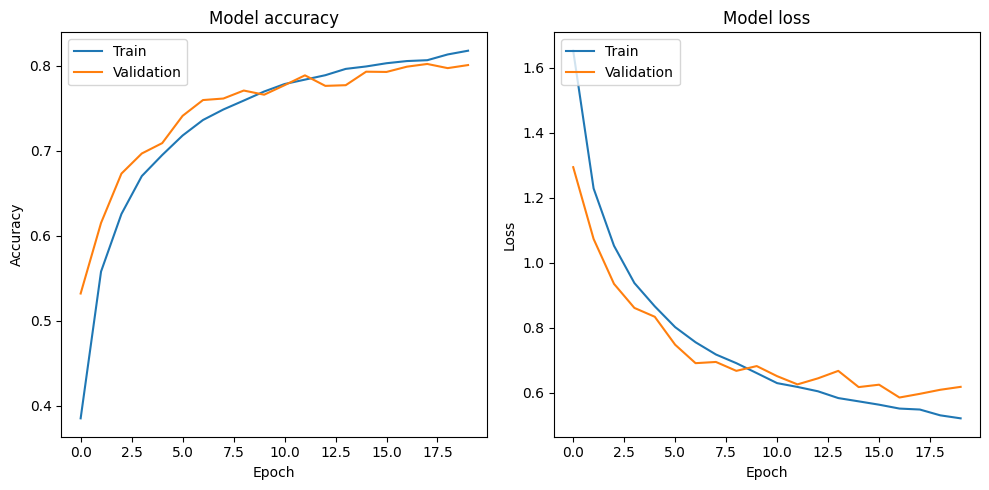

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

based on the learning curve of our model, it seems like it has trained very well and kept consistently increasing its accuracy at every step of the training. our validation data's accuracy and loss is also very close to our train data's accuracy and loss which shows how effective our regularization layers were at perventing our network from overfitting to the data.